In [4]:
pip install torch torchvision torchaudio

Note: you may need to restart the kernel to use updated packages.


In [5]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [7]:
!cd yolov5 & pip install -r "/Users/vipul/Downloads/CodeClause/Object Detection System/yolov5/requirements.txt" 

In [8]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [13]:
model = torch.hub.load("ultralytics/yolov5","yolov5s")

Using cache found in /Users/vipul/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-12-8 Python-3.11.5 torch-2.1.1 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


**Object Detection in Images**

In [14]:
img = 'https://akm-img-a-in.tosshub.com/indiatoday/images/story/202209/Society___Trends_School_1200x768.png?VersionId=Q3FNh.gRj_4jaN6CmfrunTNQUDeGJghP'

In [15]:
results = model(img)

In [16]:
results.print()

image 1/1: 675x1200 19 persons, 1 backpack, 3 chairs
Speed: 488.6ms pre-process, 87.4ms inference, 11.4ms NMS per image at shape (1, 3, 384, 640)


In [17]:
results.render()   # co-ordinate fomration

[array([[[118, 113, 109],
         [118, 113, 109],
         [116, 111, 107],
         ...,
         [170, 160, 161],
         [180, 170, 171],
         [185, 175, 176]],
 
        [[118, 113, 109],
         [117, 112, 108],
         [116, 111, 107],
         ...,
         [185, 173, 173],
         [189, 177, 177],
         [189, 177, 177]],
 
        [[118, 113, 109],
         [117, 112, 108],
         [117, 112, 108],
         ...,
         [191, 177, 176],
         [188, 174, 173],
         [185, 171, 170]],
 
        ...,
 
        [[120, 118, 131],
         [118, 116, 129],
         [117, 115, 128],
         ...,
         [ 54,  56,  55],
         [ 57,  59,  58],
         [ 53,  55,  54]],
 
        [[121, 119, 132],
         [120, 118, 131],
         [119, 117, 130],
         ...,
         [ 54,  56,  55],
         [ 57,  59,  58],
         [ 54,  56,  55]],
 
        [[124, 122, 135],
         [122, 120, 133],
         [120, 118, 131],
         ...,
         [ 54,  56,  55],
  

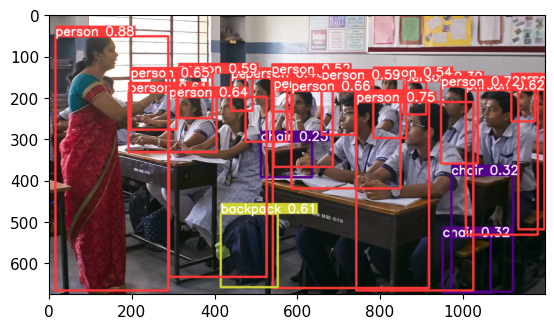

In [18]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))

**Object Detection in Videos**

In [13]:
cap = cv2.VideoCapture('/Users/vipul/Downloads/CodeClause/Object Detection System/data/1700332044917324.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # making detection 
    results = model(frame)
    
    cv2.imshow('Objects Detection',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

**Object Detection using your WebCam**

In [11]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # making detection 
    results = model(frame)
    
    cv2.imshow('Objects Detection',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()